## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
a=-1;b=2
x=np.linspace(0,20)
x=x.reshape((x.shape[0]),1)
y=((a*x)+b).reshape((x.shape[0]),1)

#### Plot your data points. 

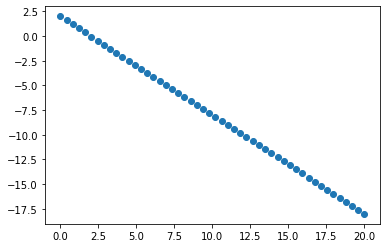

In [3]:
plt.scatter(x, y)

## Needed functions

In [6]:
def initialize_with_zeros(dim):
    w = np.zeros(shape=(dim, 1))
    b = np.zeros((1,))
    return w, b

def h(w,b,x):
    y_pred = np.dot(x,w) + b
    return y_pred

def cost(w, b, x, y,y_pred ):
    m= x.shape[0]
    j= np.sum((y_pred-y)**2)/(2*m)
    return j

def gradient(x, y,y_pred ):
    m = x.shape[0]
    res = y_pred- y
    dw = 1/m * np.dot(x.T,res)
    db = 1/m * np.sum(res)
    return dw,db

def update_parameters(w,b,dw,db,alpha):
    w = w - alpha * dw
    b = b - alpha * db
    return w,b

def my_r2_score(y,y_pred):
    ssr = np.sum((y_pred - y)**2)
    sst = np.sum((y - np.mean(y))**2)
    r2_score = 1 - (ssr/sst)
    print("r2 score",r2_score)
    return r2_score


## Adagrad

### problem definition 


For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
The funtion should have the following input parameters:
1. Input data as a matrix (or vector based on your data).
2. Target label as a vector.
3. Learning rate.
4. Epsilon.
5. Maximum number of iterations (Epochs).
The funtion should return the following outputs:
1. All predicted Theta_0 in all iterations.
2. All predicted Theta_1 in all iterations.
3. Corresponding loss for each Theta_0 and Theta_1 predictions.
4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
5.Final Optimum values of Theta_0 and Theta_1.
 Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
Calculate r2 score. Shouldn't below 0.9
 Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
 Try different values of the huperparameters and see the differnce in your results.

![image.png](attachment:image.png)

### Model 

In [126]:
#Adagrad functions

def update_parameters_adagrad(w, b, dw, db, alpha, vw, vb, eps):
    vw = vw + dw**2
    vb = vb + db**2
    w = w - (alpha / (eps + np.sqrt(vw))) * dw
    b = b - (alpha / (eps + np.sqrt(vb))) * db
    return w, b, vw, vb

def Gd_adagrad(x, y, alpha, eps, max_iterations):
    loss = []
    w_list = []
    b_list = []
    y_pred_list = []

    w, b = initialize_with_zeros(x.shape[1])
    vw = 0
    vb = 0
    for i in range(max_iterations):
        y_pred = h(w, b, x)
        y_pred_list.append(y_pred)
        j = cost(w, b, x, y, y_pred)
        loss.append(j)
        dw, db = gradient(x, y, y_pred)
        w, b, vw, vb = update_parameters_adagrad(w, b, dw, db, alpha, vw, vb, eps)
        w_list.append(w)
        b_list.append(b)
        #plt.plot(x, y_pred)
    print("w",w)
    print("b",b)

    return w, b, loss, w_list, b_list,y_pred_list


### Trial1

w [[-0.99999972]]
b [1.99999633]
r2 score 0.9999999999998997


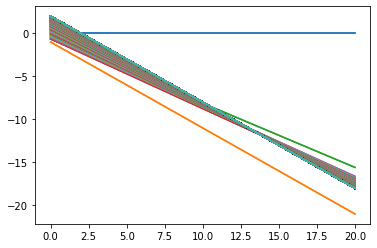

In [108]:
# parameters alpha=1, eps=1e-10, max_iterations=500
w, b, loss, w_list, b_list,y_pred_list = Gd_adagrad(x, y, alpha=1, eps=1e-10, max_iterations=500)
r=my_r2_score(y, h(w,b,x))

#plot prediction every iteration
y_t=np.squeeze(np.transpose(y_pred_list))
plt.plot(x,y_t)
plt.show()

Text(0, 0.5, 'Loss')

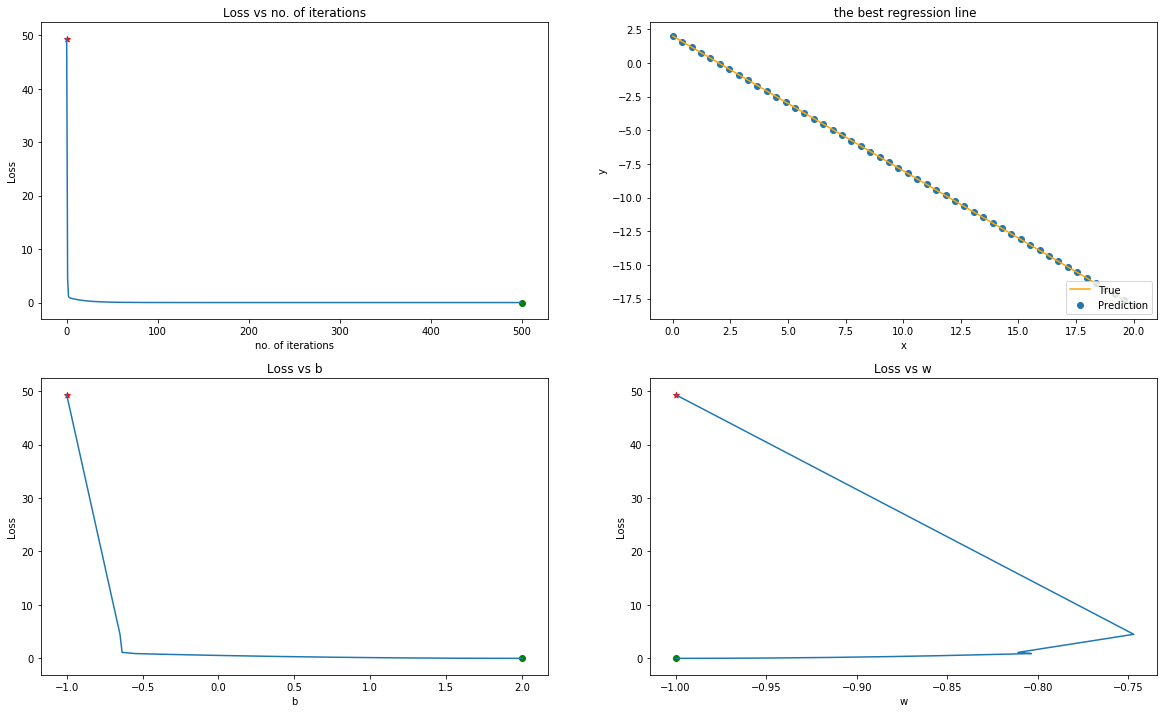

In [109]:
#ploting GD with Adagrad

#plotting x vs y
#plt.scatter(x, y)

#plotting loss vs epochs
plt.figure(figsize=(20, 12))
plt.subplot(221)
plt.plot(loss)
plt.scatter(0,loss[0], marker='*', c='r')
plt.scatter(len(loss),loss[-1], marker='o', c='g')
plt.title("Loss vs no. of iterations")
plt.xlabel("no. of iterations")
plt.ylabel("Loss")


#plotting the best regression line
plt.subplot(222)
plt.scatter(x, y)
plt.plot(x, h(w,b,x),color = 'orange')
plt.title(" the best regression line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["True", "Prediction"], loc ="lower right")

#plotting loss vs b
plt.subplot(223)
plt.plot(np.squeeze(b_list),loss)
plt.scatter(np.squeeze(b_list)[0],loss[0], marker='*', c='r')
plt.scatter(np.squeeze(b_list)[-1],loss[-1], marker='o', c='g')
plt.title("Loss vs b")
plt.xlabel("b")
plt.ylabel("Loss")

#plotting loss vs w
plt.subplot(224)
plt.plot(np.squeeze(w_list),loss)
plt.scatter(np.squeeze(w_list)[0],loss[0], marker='*', c='r')
plt.scatter(np.squeeze(w_list)[-1],loss[-1], marker='o', c='g')
plt.title("Loss vs w")
plt.xlabel("w")
plt.ylabel("Loss")



### Trial 2

w [[-0.87765063]]
b [0.39294059]
r2 score 0.9807900376025981


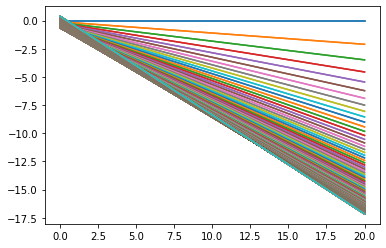

In [110]:
# parameters alpha=0.1, eps=1e-10, max_iterations=500
w, b, loss, w_list, b_list,y_pred_list = Gd_adagrad(x, y, alpha=0.1, eps=1e-10, max_iterations=500)
r=my_r2_score(y, h(w,b,x))

#plot prediction every iteration
y_t=np.squeeze(np.transpose(y_pred_list))
plt.plot(x,y_t)
plt.show()

Text(0, 0.5, 'Loss')

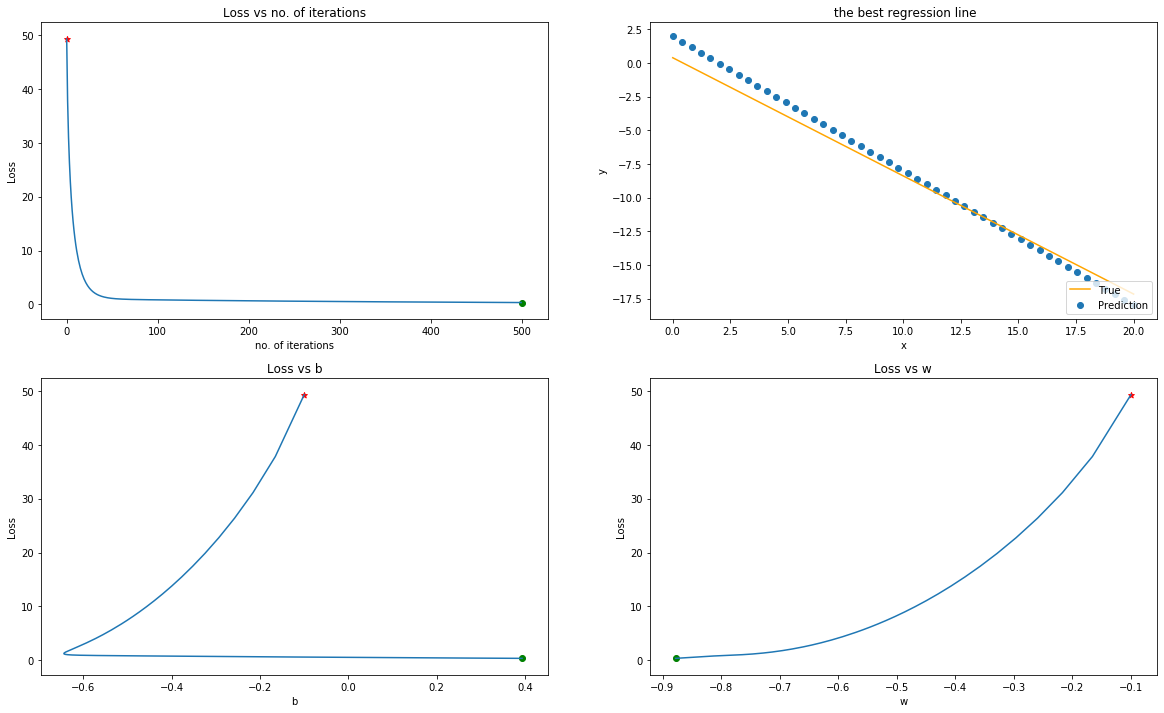

In [111]:
#ploting GD with Adagrad

#plotting x vs y
#plt.scatter(x, y)

#plotting loss vs epochs
plt.figure(figsize=(20, 12))
plt.subplot(221)
plt.plot(loss)
plt.scatter(0,loss[0], marker='*', c='r')
plt.scatter(len(loss),loss[-1], marker='o', c='g')
plt.title("Loss vs no. of iterations")
plt.xlabel("no. of iterations")
plt.ylabel("Loss")


#plotting the best regression line
plt.subplot(222)
plt.scatter(x, y)
plt.plot(x, h(w,b,x),color = 'orange')
plt.title(" the best regression line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["True", "Prediction"], loc ="lower right")

#plotting loss vs b
plt.subplot(223)
plt.plot(np.squeeze(b_list),loss)
plt.scatter(np.squeeze(b_list)[0],loss[0], marker='*', c='r')
plt.scatter(np.squeeze(b_list)[-1],loss[-1], marker='o', c='g')
plt.title("Loss vs b")
plt.xlabel("b")
plt.ylabel("Loss")

#plotting loss vs w
plt.subplot(224)
plt.plot(np.squeeze(w_list),loss)
plt.scatter(np.squeeze(w_list)[0],loss[0], marker='*', c='r')
plt.scatter(np.squeeze(w_list)[-1],loss[-1], marker='o', c='g')
plt.title("Loss vs w")
plt.xlabel("w")
plt.ylabel("Loss")

 

## RMSProp

### Problem Definition 

Update the previos implementation to be RMSProp.

![image.png](attachment:image.png)

### Model

In [127]:
#RMSPROP functions

def update_parameters_RMSProp(w, b, dw, db, alpha, vw, vb, eps,gamma):
    vw = gamma*vw + (1-gamma)*(dw**2)
    vb = gamma*vb + (1-gamma)*(db**2)
    w = w - (alpha / (eps + np.sqrt(vw))) * dw
    b = b - (alpha / (eps + np.sqrt(vb))) * db
    return w, b, vw, vb

def Gd_RMSProp(x, y, alpha, eps,gamma, max_iterations):
    loss = []
    w_list = []
    b_list = []
    y_pred_list = []

    w, b = initialize_with_zeros(x.shape[1])
    vw = 0
    vb = 0
    for i in range(max_iterations):
        y_pred = h(w, b, x)
        y_pred_list.append(y_pred)
        j = cost(w, b, x, y, y_pred)
        loss.append(j)
        dw, db = gradient(x, y, y_pred)
        w, b, vw, vb = update_parameters_RMSProp(w, b, dw, db, alpha, vw, vb, eps,gamma)
        w_list.append(w)
        b_list.append(b)
        #plt.plot(x, y_pred)
    print("w",w)
    print("b",b)

    return w, b, loss, w_list, b_list,y_pred_list

### Trial 1

w [[-0.99493519]]
b [2.0041474]
r2 score 0.9998878035145026


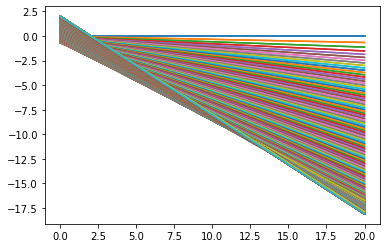

In [112]:
# parameters alpha=0.01,eps=1e-10,gamma=0.9, max_iterations=500
w, b, loss, w_list, b_list,y_pred_list = Gd_RMSProp(x, y, alpha=0.01,eps=1e-10,gamma=0.9, max_iterations=500)
r=my_r2_score(y, h(w,b,x))

#plot prediction every iteration
y_t=np.squeeze(np.transpose(y_pred_list))
plt.plot(x,y_t)
plt.show()

Text(0, 0.5, 'Loss')

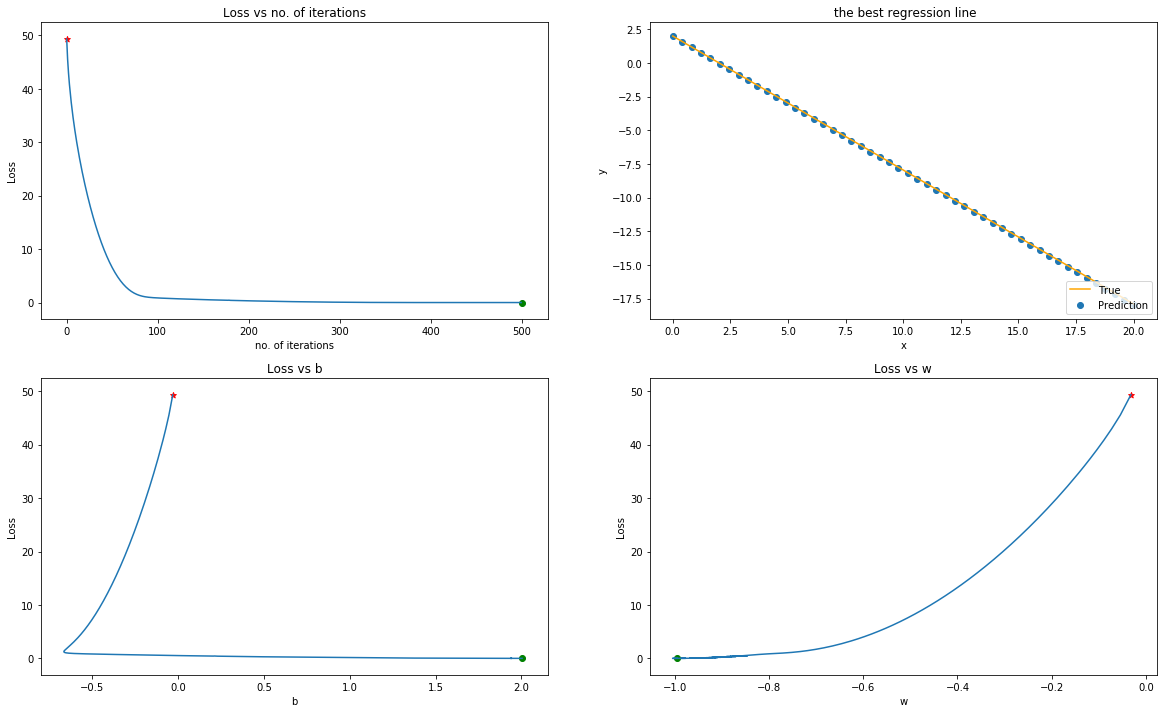

In [38]:
#ploting with RMSProp

#plotting x vs y
#plt.scatter(x, y)

#plotting loss vs epochs
plt.figure(figsize=(20, 12))
plt.subplot(221)
plt.plot(loss)
plt.scatter(0,loss[0], marker='*', c='r')
plt.scatter(len(loss),loss[-1], marker='o', c='g')
plt.title("Loss vs no. of iterations")
plt.xlabel("no. of iterations")
plt.ylabel("Loss")


#plotting the best regression line
plt.subplot(222)
plt.scatter(x, y)
plt.plot(x, h(w,b,x),color = 'orange')
plt.title(" the best regression line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["True", "Prediction"], loc ="lower right")

#plotting loss vs b
plt.subplot(223)
plt.plot(np.squeeze(b_list),loss)
plt.scatter(np.squeeze(b_list)[0],loss[0], marker='*', c='r')
plt.scatter(np.squeeze(b_list)[-1],loss[-1], marker='o', c='g')
plt.title("Loss vs b")
plt.xlabel("b")
plt.ylabel("Loss")

#plotting loss vs w
plt.subplot(224)
plt.plot(np.squeeze(w_list),loss)
plt.scatter(np.squeeze(w_list)[0],loss[0], marker='*', c='r')
plt.scatter(np.squeeze(w_list)[-1],loss[-1], marker='o', c='g')
plt.title("Loss vs w")
plt.xlabel("w")
plt.ylabel("Loss")



### Trial 2

w [[-1.05]]
b [1.95]
r2 score 0.9887808823526947


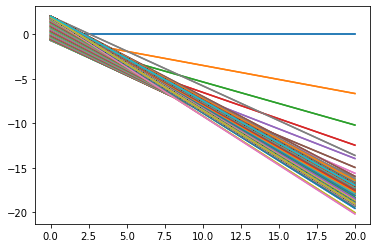

In [115]:
# parameters alpha=0.1,eps=1e-10,gamma=0.9, max_iterations=500
w, b, loss, w_list, b_list,y_pred_list = Gd_RMSProp(x, y, alpha=0.1,eps=1e-10,gamma=0.9, max_iterations=500)
r=my_r2_score(y, h(w,b,x))

#plot prediction every iteration
y_t=np.squeeze(np.transpose(y_pred_list))
plt.plot(x,y_t)
plt.show()

Text(0, 0.5, 'Loss')

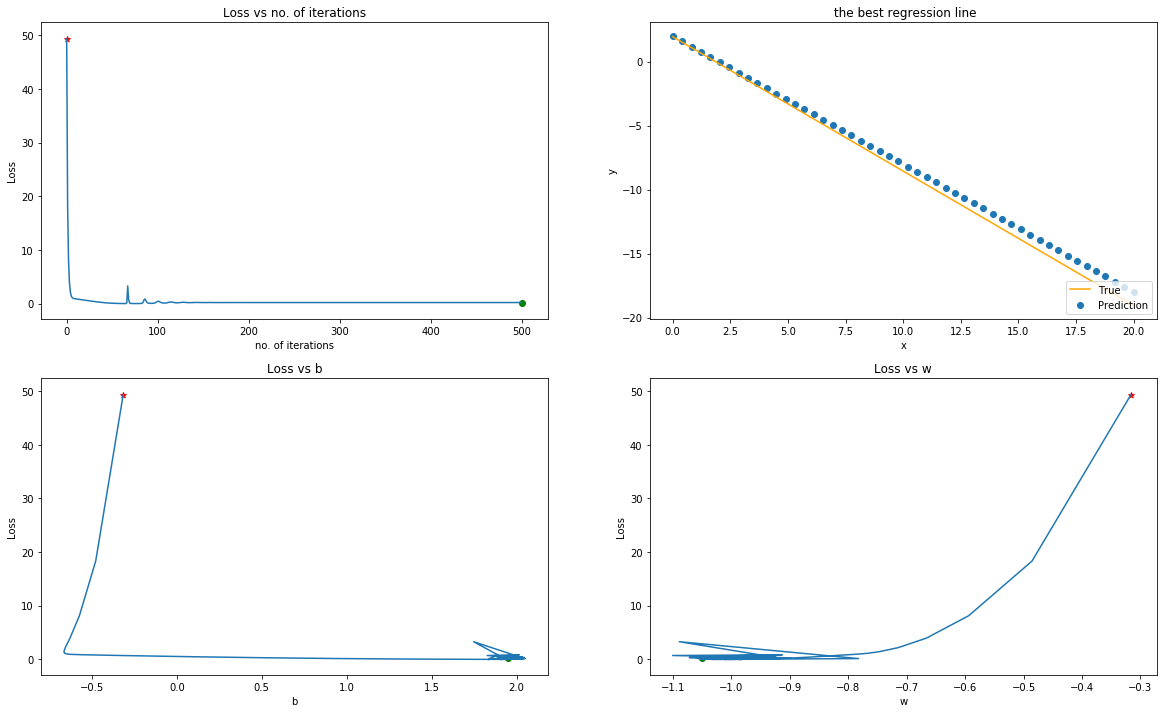

In [116]:
#ploting with RMSProp

#plotting x vs y
#plt.scatter(x, y)

#plotting loss vs epochs
plt.figure(figsize=(20, 12))
plt.subplot(221)
plt.plot(loss)
plt.scatter(0,loss[0], marker='*', c='r')
plt.scatter(len(loss),loss[-1], marker='o', c='g')
plt.title("Loss vs no. of iterations")
plt.xlabel("no. of iterations")
plt.ylabel("Loss")


#plotting the best regression line
plt.subplot(222)
plt.scatter(x, y)
plt.plot(x, h(w,b,x),color = 'orange')
plt.title(" the best regression line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["True", "Prediction"], loc ="lower right")

#plotting loss vs b
plt.subplot(223)
plt.plot(np.squeeze(b_list),loss)
plt.scatter(np.squeeze(b_list)[0],loss[0], marker='*', c='r')
plt.scatter(np.squeeze(b_list)[-1],loss[-1], marker='o', c='g')
plt.title("Loss vs b")
plt.xlabel("b")
plt.ylabel("Loss")

#plotting loss vs w
plt.subplot(224)
plt.plot(np.squeeze(w_list),loss)
plt.scatter(np.squeeze(w_list)[0],loss[0], marker='*', c='r')
plt.scatter(np.squeeze(w_list)[-1],loss[-1], marker='o', c='g')
plt.title("Loss vs w")
plt.xlabel("w")
plt.ylabel("Loss")



### Comment 

In [ ]:
alpha =0.01 is smoother than alpha =0.1 and it also has better r2 score 

## Adam

### Problem defintion 


![image-4.png](attachment:image-4.png)

In [ ]:
Update the previos implementation to be Adam.

### Model

In [134]:
#Adam functions

def update_parameters_adam(w, b, dw, db, alpha, vw, vb,mw,mb,eps,gamma1,gamma2,num_updates):
    mw = gamma1*mw + (1-gamma1)*(dw)
    mb = gamma1*mb + (1-gamma1)*(db)
    mw_corr = mw/(1-(gamma1**num_updates))
    mb_corr = mb/(1-(gamma1**num_updates))
    
    vw = gamma2*vw + (1-gamma2)*(dw**2)
    vb = gamma2*vb + (1-gamma2)*(db**2)
    vw_corr = vw/(1-(gamma2**num_updates))
    vb_corr = vb/(1-(gamma2**num_updates))
    
    w = w - (alpha / (eps + vw_corr**0.5)) * mw_corr
    b = b - (alpha / (eps + vb_corr**0.5)) * mb_corr
    return w, b, vw, vb ,mw,mb

def Gd_adam(x, y, alpha, eps,gamma1,gamma2, max_iterations):
    loss = []
    w_list = []
    b_list = []
    y_pred_list = []
    w, b = initialize_with_zeros(x.shape[1])
    vw = 0;vb = 0;mw = 0;mb = 0
    num_updates=0
    for i in range(max_iterations):
        y_pred = h(w, b, x)
        y_pred_list.append(y_pred)
        j = cost(w, b, x, y, y_pred)
        loss.append(j)
        dw, db = gradient(x, y, y_pred)
        num_updates= i+1
        w, b, vw, vb,mw,mb = update_parameters_adam(w,b,dw,db,alpha,vw,vb,mw,mb,eps,gamma1,gamma2,num_updates)
        w_list.append(w)
        b_list.append(b)
        #plt.plot(x, y_pred)
    print("w",w)
    print("b",b)

    return w, b, loss, w_list, b_list,y_pred_list


###  Trial 1 

w [[-1.00000002]]
b [2.00000023]
r2 score 0.9999999999999996


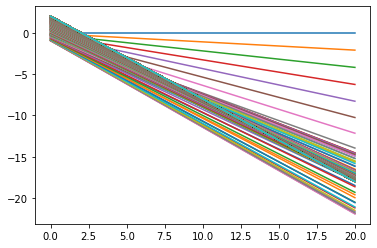

In [118]:
#parameters alpha=0.1,eps=1e-10,gamma1=0.9,gamma2=0.999, max_iterations=200
w,b,loss,w_list,b_list,y_pred_list = Gd_adam(x,y,alpha=0.1,eps=1e-10,gamma1=0.9,gamma2=0.999, max_iterations=500)
r=my_r2_score(y, h(w,b,x))

#plot prediction every iteration
y_t=np.squeeze(np.transpose(y_pred_list))
plt.plot(x,y_t)
plt.show()

Text(0, 0.5, 'Loss')

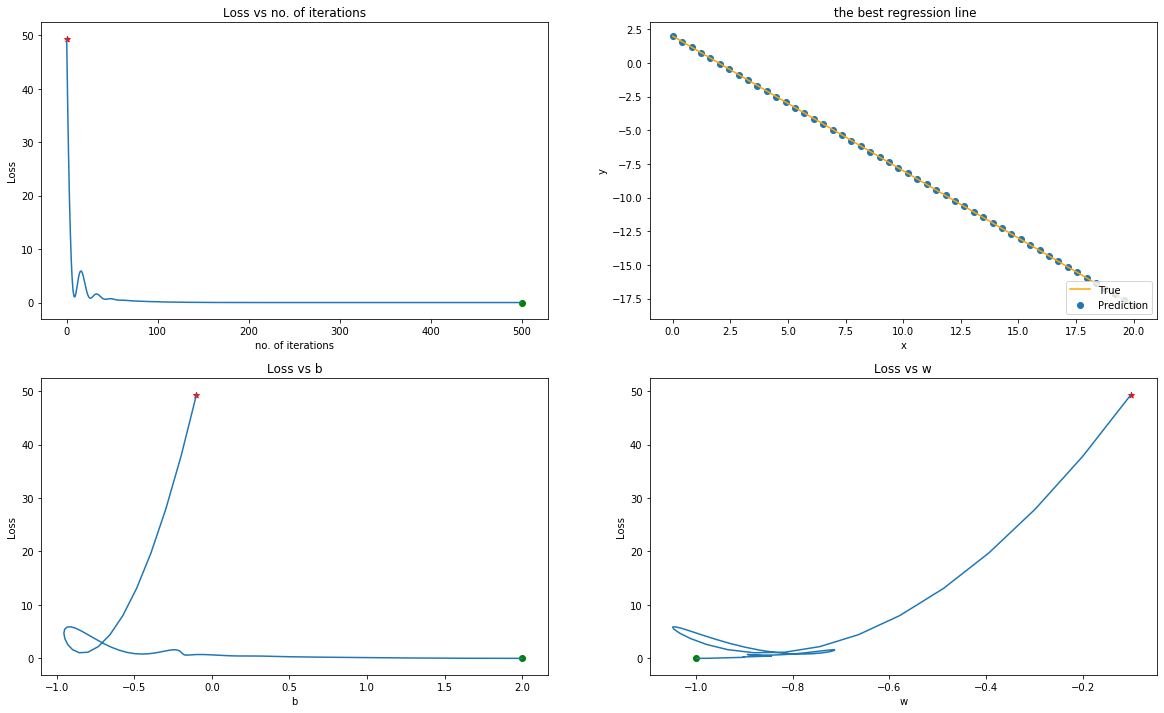

In [119]:
#ploting GD with Adam

#plotting x vs y
#plt.scatter(x, y)

#plotting loss vs epochs
plt.figure(figsize=(20, 12))
plt.subplot(221)
plt.plot(loss)
plt.scatter(0,loss[0], marker='*', c='r')
plt.scatter(len(loss),loss[-1], marker='o', c='g')
plt.title("Loss vs no. of iterations")
plt.xlabel("no. of iterations")
plt.ylabel("Loss")


#plotting the best regression line
plt.subplot(222)
plt.scatter(x, y)
plt.plot(x, h(w,b,x),color = 'orange')
plt.title(" the best regression line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["True", "Prediction"], loc ="lower right")

#plotting loss vs b
plt.subplot(223)
plt.plot(np.squeeze(b_list),loss)
plt.scatter(np.squeeze(b_list)[0],loss[0], marker='*', c='r')
plt.scatter(np.squeeze(b_list)[-1],loss[-1], marker='o', c='g')
plt.title("Loss vs b")
plt.xlabel("b")
plt.ylabel("Loss")

#plotting loss vs w
plt.subplot(224)
plt.plot(np.squeeze(w_list),loss)
plt.scatter(np.squeeze(w_list)[0],loss[0], marker='*', c='r')
plt.scatter(np.squeeze(w_list)[-1],loss[-1], marker='o', c='g')
plt.title("Loss vs w")
plt.xlabel("w")
plt.ylabel("Loss")



###  Trial 2

w [[-1.]]
b [2.]
r2 score 1.0


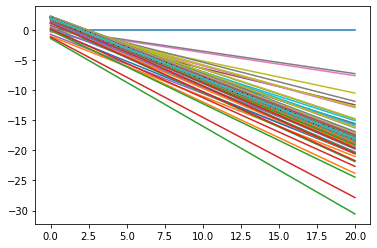

In [120]:
#parameters alpha=1,eps=1e-10,gamma1=0.9,gamma2=0.999, max_iterations=500
w,b,loss,w_list,b_list,y_pred_list = Gd_adam(x,y,alpha=1,eps=1e-10,gamma1=0.9,gamma2=0.999, max_iterations=500)
r=my_r2_score(y, h(w,b,x))

#plot prediction every iteration
y_t=np.squeeze(np.transpose(y_pred_list))
plt.plot(x,y_t)
plt.show()

Text(0, 0.5, 'Loss')

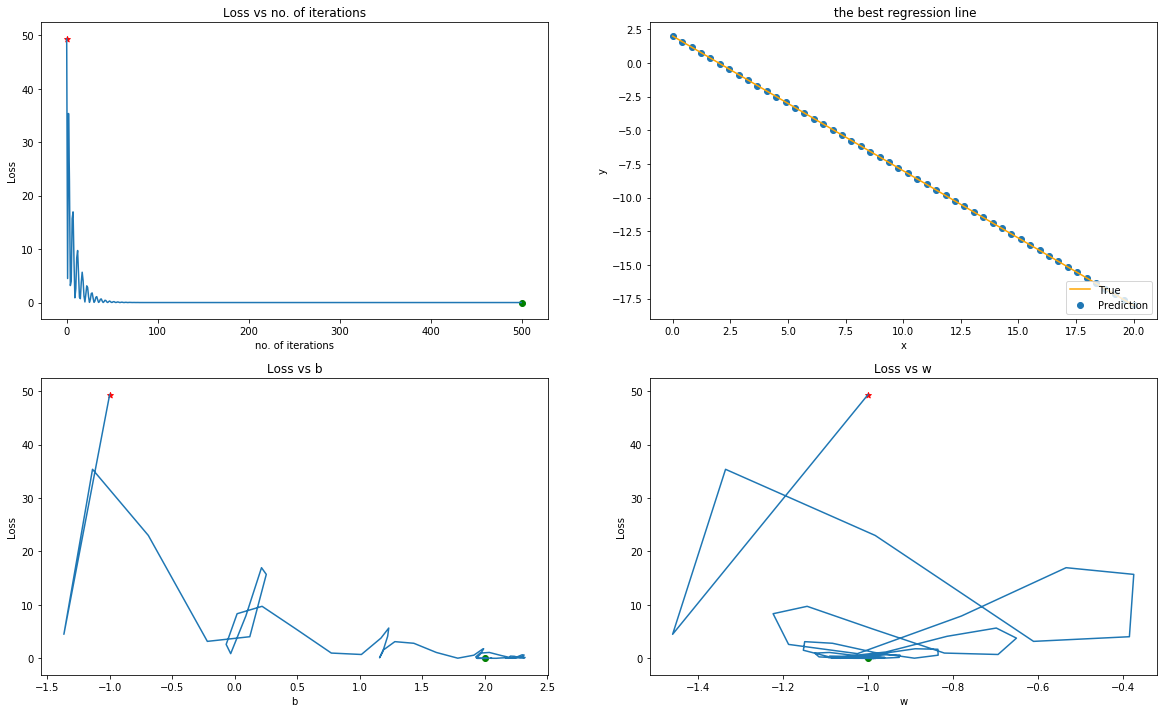

In [121]:
#ploting GD with Adam

#plotting x vs y
#plt.scatter(x, y)

#plotting loss vs epochs
plt.figure(figsize=(20, 12))
plt.subplot(221)
plt.plot(loss)
plt.scatter(0,loss[0], marker='*', c='r')
plt.scatter(len(loss),loss[-1], marker='o', c='g')
plt.title("Loss vs no. of iterations")
plt.xlabel("no. of iterations")
plt.ylabel("Loss")


#plotting the best regression line
plt.subplot(222)
plt.scatter(x, y)
plt.plot(x, h(w,b,x),color = 'orange')
plt.title(" the best regression line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["True", "Prediction"], loc ="lower right")

#plotting loss vs b
plt.subplot(223)
plt.plot(np.squeeze(b_list),loss)
plt.scatter(np.squeeze(b_list)[0],loss[0], marker='*', c='r')
plt.scatter(np.squeeze(b_list)[-1],loss[-1], marker='o', c='g')
plt.title("Loss vs b")
plt.xlabel("b")
plt.ylabel("Loss")

#plotting loss vs w
plt.subplot(224)
plt.plot(np.squeeze(w_list),loss)
plt.scatter(np.squeeze(w_list)[0],loss[0], marker='*', c='r')
plt.scatter(np.squeeze(w_list)[-1],loss[-1], marker='o', c='g')
plt.title("Loss vs w")
plt.xlabel("w")
plt.ylabel("Loss")



### Comment

alpha =1 is not smooth like alpha =0.1 although it has better r2 score 

## Compareing the 3 algorithm

### parameters and r2 score

In [129]:
#parameters and r2 score
#Adagrad
print("Adagrad")
w_Adagrad, b_Adagrad, loss_Adagrad, w_list_Adagrad, b_list_Adagrad, y_pred_list_Adagrad = Gd_adagrad(
    x, y, alpha=0.1, eps=1e-10, max_iterations=500)
r_Adagrad = my_r2_score(y, h(w_Adagrad, b_Adagrad, x))
#RMSprop
print("RMSprop")
w_RMS, b_RMS, loss_RMS, w_list_RMS, b_list_RMS, y_pred_list_RMS = Gd_RMSProp(
    x, y, alpha=0.1, eps=1e-10, gamma=0.9, max_iterations=500)
r_RMS = my_r2_score(y, h(w_RMS, b_RMS, x))
#Adam
print("Adam")
w_Adam, b_Adam, loss_Adam, w_list_Adam, b_list_Adam, y_pred_list_Adam = Gd_adam(
    x, y, alpha=0.1, eps=1e-10, gamma1=0.9, gamma2=0.999, max_iterations=500)
r_Adam = my_r2_score(y, h(w_Adam, b_Adam, x))

Adagrad
w [[-0.87765063]]
b [0.39294059]
r2 score 0.9807900376025981
RMSprop
w [[-1.05]]
b [1.95]
r2 score 0.9887808823526947
Adam
w [[-1.00000002]]
b [2.00000023]
r2 score 0.9999999999999996


### ploting loss vs epochs

Text(0, 0.5, 'LossAdam')

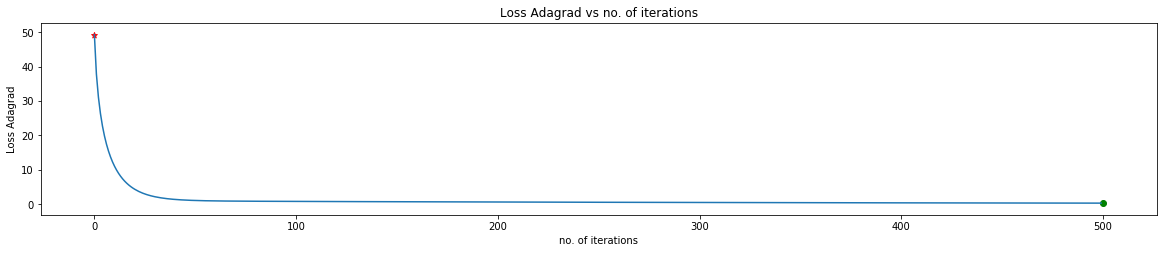

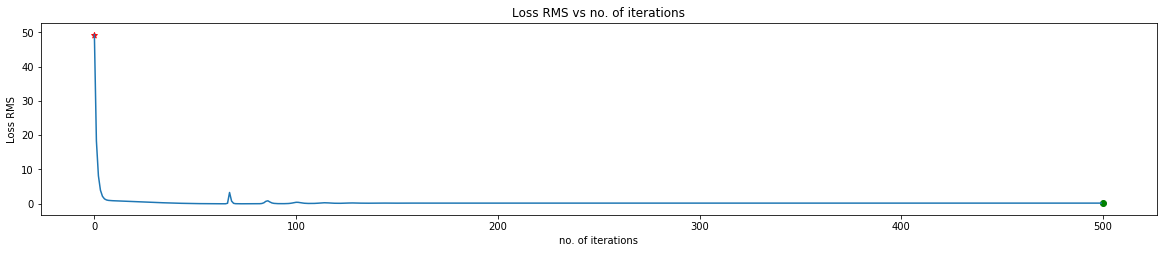

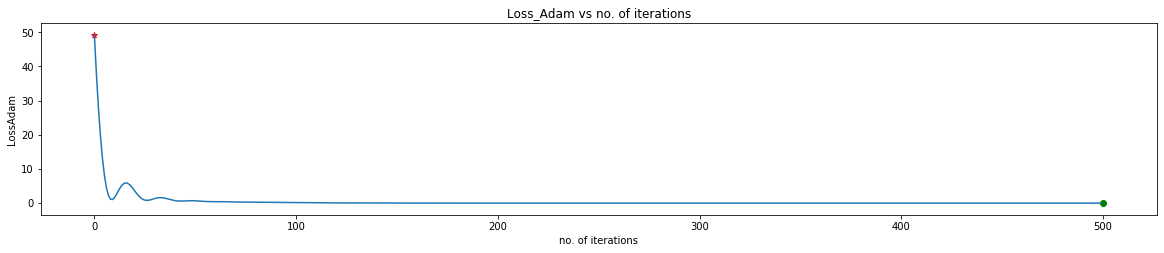

In [130]:
#ploting loss vs epochs

#plotting x vs y
#plt.scatter(x, y)

#plotting loss vs epochs for Adagrad
plt.figure(figsize=(20, 12))
plt.subplot(311)
plt.plot(loss_Adagrad)
plt.scatter(0,loss_Adagrad[0], marker='*', c='r')
plt.scatter(len(loss_Adagrad),loss_Adagrad[-1], marker='o', c='g')
plt.title("Loss Adagrad vs no. of iterations")
plt.xlabel("no. of iterations")
plt.ylabel("Loss Adagrad")

#plotting loss vs epochs for RMS
plt.figure(figsize=(20, 12))
plt.subplot(312)
plt.plot(loss_RMS)
plt.scatter(0,loss_RMS[0], marker='*', c='r')
plt.scatter(len(loss_RMS),loss_RMS[-1], marker='o', c='g')
plt.title("Loss RMS vs no. of iterations")
plt.xlabel("no. of iterations")
plt.ylabel("Loss RMS")

#plotting loss vs epochs for Adam
plt.figure(figsize=(20, 12))
plt.subplot(313)
plt.plot(loss_Adam)
plt.scatter(0,loss_Adam[0], marker='*', c='r')
plt.scatter(len(loss_Adam),loss_Adam[-1], marker='o', c='g')
plt.title("Loss_Adam vs no. of iterations")
plt.xlabel("no. of iterations")
plt.ylabel("LossAdam")

### plotting the best regression line

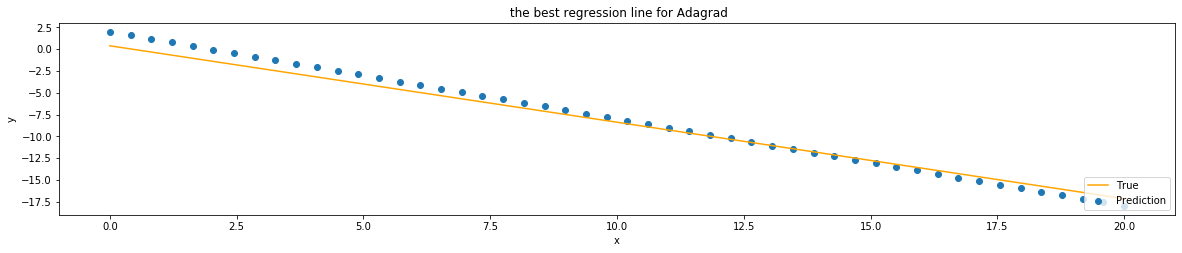

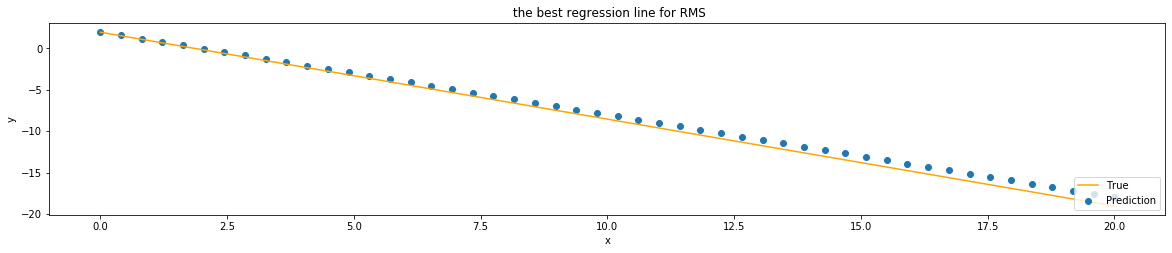

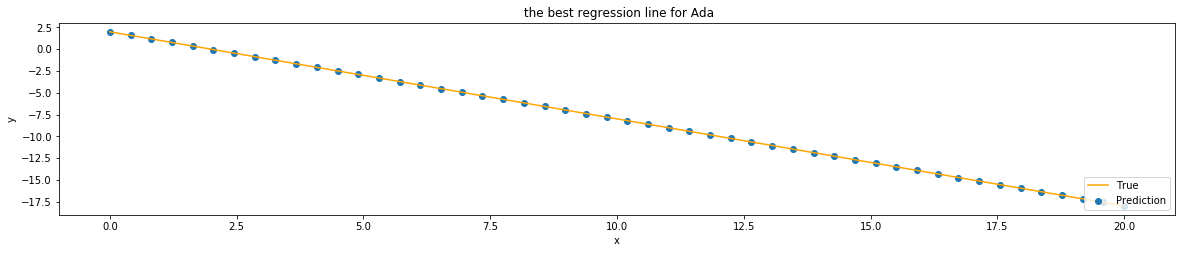

In [131]:
#plotting the best regression line 

#plotting the best regression line for Adagrad
plt.figure(figsize=(20, 12))
plt.subplot(311)
plt.scatter(x, y)
plt.plot(x, h(w_Adagrad,b_Adagrad,x),color = 'orange')
plt.title(" the best regression line for Adagrad")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["True", "Prediction"], loc ="lower right")

#plotting the best regression line for RMS
plt.figure(figsize=(20, 12))
plt.subplot(312)
plt.scatter(x, y)
plt.plot(x, h(w_RMS,b_RMS,x),color = 'orange')
plt.title(" the best regression line for RMS")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["True", "Prediction"], loc ="lower right")

#plotting the best regression line for Ada
plt.figure(figsize=(20, 12))
plt.subplot(313)
plt.scatter(x, y)
plt.plot(x, h(w_Adam,b_Adam,x),color = 'orange')
plt.title(" the best regression line for Ada")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["True", "Prediction"], loc ="lower right")


### plotting loss vs b

Text(0, 0.5, 'Loss')

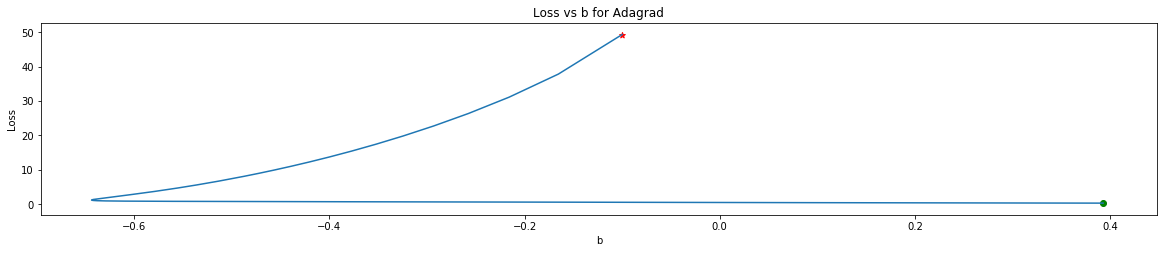

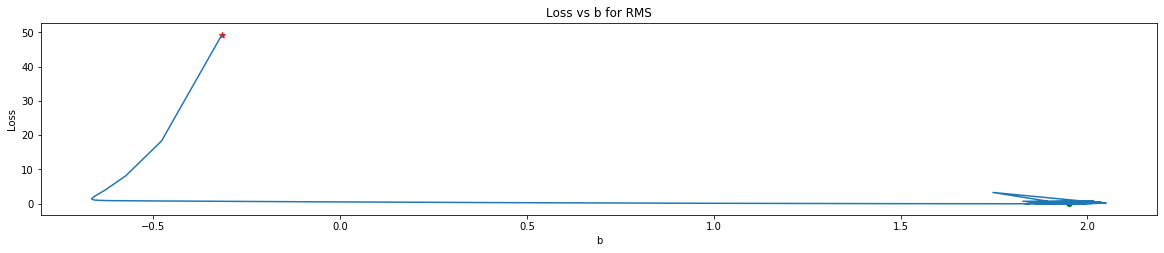

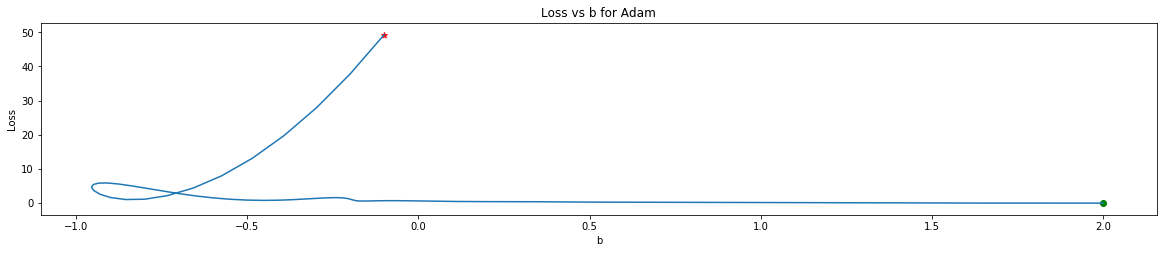

In [132]:
#plotting loss vs b

#plotting loss vs b for Adagrad
plt.figure(figsize=(20, 12))
plt.subplot(313)
plt.plot(np.squeeze(b_list_Adagrad),loss_Adagrad)
plt.scatter(np.squeeze(b_list_Adagrad)[0],loss_Adagrad[0], marker='*', c='r')
plt.scatter(np.squeeze(b_list_Adagrad)[-1],loss_Adagrad[-1], marker='o', c='g')
plt.title("Loss vs b for Adagrad")
plt.xlabel("b")
plt.ylabel("Loss")

#plotting loss vs b for RMS
plt.figure(figsize=(20, 12))
plt.subplot(313)
plt.plot(np.squeeze(b_list_RMS),loss_RMS)
plt.scatter(np.squeeze(b_list_RMS)[0],loss_RMS[0], marker='*', c='r')
plt.scatter(np.squeeze(b_list_RMS)[-1],loss_RMS[-1], marker='o', c='g')
plt.title("Loss vs b for RMS")
plt.xlabel("b")
plt.ylabel("Loss")

#plotting loss vs b for Adam
plt.figure(figsize=(20, 12))
plt.subplot(313)
plt.plot(np.squeeze(b_list_Adam),loss_Adam)
plt.scatter(np.squeeze(b_list_Adam)[0],loss_Adam[0], marker='*', c='r')
plt.scatter(np.squeeze(b_list_Adam)[-1],loss_Adam[-1], marker='o', c='g')
plt.title("Loss vs b for Adam")
plt.xlabel("b")
plt.ylabel("Loss")

### plotting loss vs w

Text(0, 0.5, 'Loss')

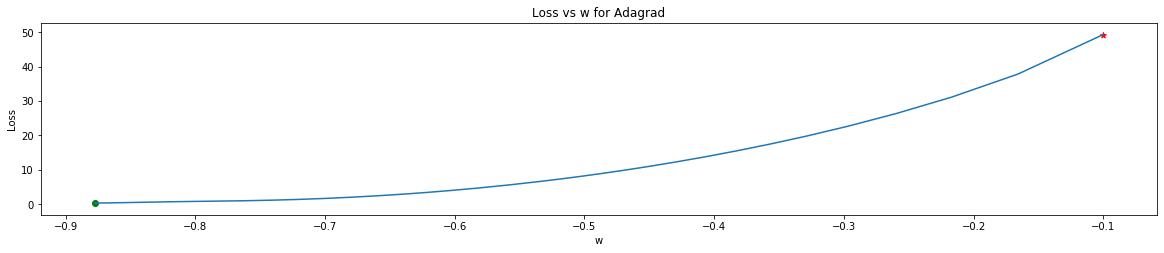

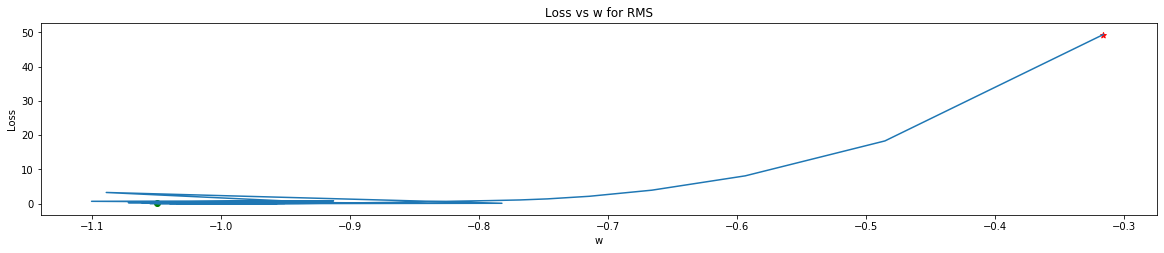

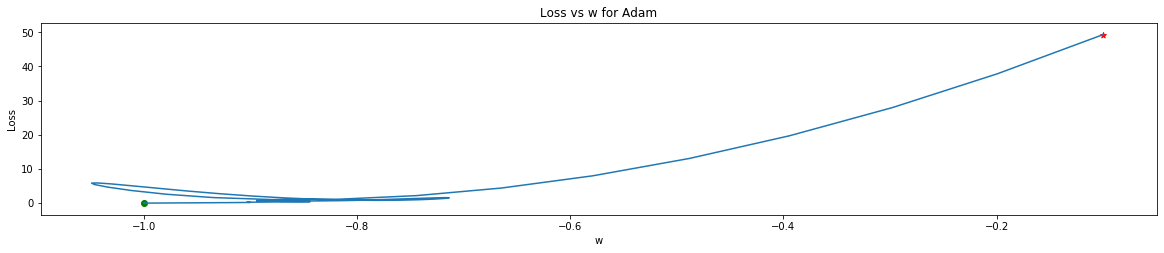

In [133]:
#plotting loss vs w

#plotting loss vs w for Adagrad
plt.figure(figsize=(20, 12))
plt.subplot(311)
plt.plot(np.squeeze(w_list_Adagrad),loss_Adagrad)
plt.scatter(np.squeeze(w_list_Adagrad)[0],loss_Adagrad[0], marker='*', c='r')
plt.scatter(np.squeeze(w_list_Adagrad)[-1],loss_Adagrad[-1], marker='o', c='g')
plt.title("Loss vs w for Adagrad")
plt.xlabel("w")
plt.ylabel("Loss")

#plotting loss vs w for RMS
plt.figure(figsize=(20, 12))
plt.subplot(312)
plt.plot(np.squeeze(w_list_RMS),loss_RMS)
plt.scatter(np.squeeze(w_list_RMS)[0],loss_RMS[0], marker='*', c='r')
plt.scatter(np.squeeze(w_list_RMS)[-1],loss_RMS[-1], marker='o', c='g')
plt.title("Loss vs w for RMS")
plt.xlabel("w")
plt.ylabel("Loss")

#plotting loss vs w for Adam
plt.figure(figsize=(20, 12))
plt.subplot(313)
plt.plot(np.squeeze(w_list_Adam),loss_Adam)
plt.scatter(np.squeeze(w_list_Adam)[0],loss_Adam[0], marker='*', c='r')
plt.scatter(np.squeeze(w_list_Adam)[-1],loss_Adam[-1], marker='o', c='g')
plt.title("Loss vs w for Adam")
plt.xlabel("w")
plt.ylabel("Loss")

## Congratulations 
![image.png](attachment:image.png)